# Activity Analysis
## Questions

- Stacked bar chart of calories by day and activity type
- How many calories do I burn by activity type on average?
- See 'Total Activity Time' correlate Time vs Calorie Burn, what is more time effective?

In [134]:
# An analysis on calories burnt by activity type - 
import pandas as pd
import matplotlib.pyplot as plt

# What week is it?
week = "Week 46"

# Try to import the CSV file, handling potential errors
try:
    # Import in CSV file and skip the first row
    activity_calories = pd.read_csv('Week 46/Activity Calories.csv', skiprows=[0])

    # New column names
    new_column_names = ['Day', 'Activity Type', 'Value']
    
    # Ensure the number of new column names matches the number of columns in the DataFrame
    if len(new_column_names) == len(activity_calories.columns):
        activity_calories.columns = new_column_names
    else:
        print("Error: The number of new column names does not match the number of columns in the DataFrame")

    # Replace 'Fitness Equipment' with 'Gym Cardio' in the 'Activity Type' column
    activity_calories['Activity Type'] = activity_calories['Activity Type'].replace('Fitness Equipment', 'Gym Cardio')
    
    # Print the DataFrame to inspect
    #print(activity_calories)#.head())
    
except FileNotFoundError:
    print("The specified file was not found.")


# Some Math

In [135]:
# How many calories do I burn by activity type on average?
average_calories_by_type = round(activity_calories.groupby('Activity Type')['Value'].mean(), 0)

average_GymCardio_calorie = int(round(average_calories_by_type.iloc[0]))

average_Walking_calorie = int(round(average_calories_by_type.iloc[1]))

Description = f'On average, you burnt {average_GymCardio_calorie} calories at the gym and {average_Walking_calorie} walking each day.'

# Some Plotting

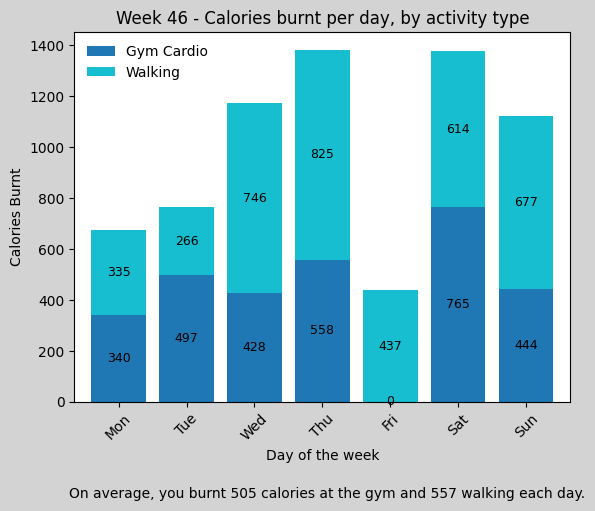

In [136]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

# Rename the dataframe for easy usage
df = activity_calories

# Group the dataframe by the 'Day' and 'Activity Type' columns, then sum the values and unstack.
grouped = df.groupby(['Day','Activity Type']).sum()['Value'].unstack()

# Reorder bars
order = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']

# Stacked bar chart - https://matplotlib.org/stable/users/explain/colors/colormaps.html
ax = grouped.loc[order].plot(kind='bar', stacked=True, colormap='tab10', width=0.8)

# Set the background color of the entire figure
fig = plt.gcf()
fig.set_facecolor('lightgrey')

# Set the color of the graph itself
ax.set_facecolor('white')

# Edit the legend
ax.legend(loc='upper left', frameon=False)# ncol=2)

# Label axis
plt.xlabel('Day of the week', color='black')
plt.ylabel('Calories Burnt', color='black')
plt.title(week + ' - Calories burnt per day, by activity type', color='black')

# Customize x ticks
plt.xticks(rotation=45, color='black')

# Customize y ticks - Calculate the maximum y value (max calories)
max_calories = grouped.sum(axis=1).max()  # Max sum of calories for any day

# Create a list of y-ticks at 500 calorie intervals
yticks = range(0, int(max_calories) + 500, 500)
plt.yticks(color='black')

# Add the value of calories to each bar:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center', 
            size=9)

ax.annotate(Description,
            xy = (1.03, -0.25),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

# Show me the dam thing
plt.show()